<a href="https://colab.research.google.com/github/jodekpotasu/classification42/blob/main/projekt_prak2_bez_skalowania_ale_z_zapisem_pliku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [430]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from google.colab import files
from bs4 import BeautifulSoup
import requests
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import plotly 
import plotly.graph_objects as go 
from plotly.offline import iplot 
import plotly.express as px
import plotly.figure_factory as ff
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import xlwt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [431]:
url = 'https://raw.githubusercontent.com/jodekpotasu/classification42/main/df1.csv'
trainingx = pd.read_csv(url)

In [432]:
trainingx

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0
2,164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0
3,395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0
4,53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,7975,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,14075.0,1.0
4445,7976,8823.0,Travel_Rarely,621.0,Research & Development,15.0,3.0,Medical,1.0,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,14075.0,1.0
4446,7977,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2104.0,2.0
4447,7978,44.0,Non-Travel,381.0,Research & Development,918785.0,3.0,Medical,1.0,1.0,Male,49.0,1.0,1.0,Laboratory Technician,3.0,Single,3708.0,2104.0,2.0


In [433]:
url = 'https://raw.githubusercontent.com/jodekpotasu/classification42/main/attrition.csv'
trainingy = pd.read_csv(url)

In [434]:
trainingy

,EmployeeNumber,Attrition
0,104,No
1,1638,No
2,164,No
3,395,No
4,53,No
...,...,...
4444,7975,Yes
4445,7976,Yes
4446,7977,Yes
4447,7978,Yes


In [435]:
url = 'https://raw.githubusercontent.com/jodekpotasu/classification42/main/df2.csv'
testx = pd.read_csv(url)

In [436]:
testx

,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
2,164,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
3,395,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
4,53,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,7975,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4445,7976,Y,No,11.0,3.0,4.0,80.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,Yes,95736.0
4446,7977,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0
4447,7978,Y,No,14.0,3.0,3.0,80.0,0.0,9.0,5.0,3.0,5.0,2.0,1.0,4.0,Yes,44496.0


In [437]:
url = 'https://raw.githubusercontent.com/jodekpotasu/classification42/main/sample_output.csv'
testy = pd.read_csv(url)

In [438]:
testy

,EmployeeNumber,Attrition
0,100000,1
1,100001,1
2,100002,1
3,100003,1
4,100004,1
...,...,...
142,100142,1
143,100143,1
144,100144,1
145,100145,1


In [439]:
data = trainingx.merge(trainingy)


In [440]:
data = data.drop(['EmployeeCount','DailyRate',  'MonthlyRate'  ], axis=1)
data.describe(include='all')

,EmployeeNumber,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Attrition
count,4449.000000,4449.000000,4449,4449,4449.000000,4449.000000,4449,4449.000000,4449,4449.000000,4449.000000,4449.000000,4449,4449.000000,4449,4449.000000,4449.000000,4302
unique,NaN,NaN,3,3,NaN,NaN,6,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,2
top,NaN,NaN,Travel_Rarely,Research & Development,NaN,NaN,Life Sciences,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,Yes
freq,NaN,NaN,3147,2916,NaN,NaN,1823,NaN,2681,NaN,NaN,NaN,983,NaN,2074,NaN,NaN,2222
mean,7956.865588,416.187458,NaN,NaN,33339.433356,2.909867,NaN,2.719263,NaN,65.977073,2.739492,2.053495,NaN,2.724882,NaN,6468.496067,2.681726,NaN
std,17226.922333,1566.205147,NaN,NaN,145352.131423,1.025184,NaN,1.093263,NaN,20.277369,0.712660,1.102979,NaN,1.107453,NaN,4682.905422,2.487077,NaN
min,1.000000,18.000000,NaN,NaN,1.000000,1.000000,NaN,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,0.000000,NaN
25%,1735.000000,31.000000,NaN,NaN,2.000000,2.000000,NaN,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2899.000000,1.000000,NaN
50%,5902.000000,36.000000,NaN,NaN,8.000000,3.000000,NaN,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4876.000000,2.000000,NaN
75%,7014.000000,45.000000,NaN,NaN,17.000000,4.000000,NaN,4.000000,NaN,84.000000,3.000000,3.000000,NaN,4.000000,NaN,8346.000000,4.000000,NaN


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



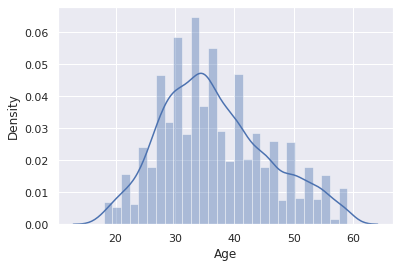

In [441]:
q = data['Age'].quantile(0.932)
data1 = data[data['Age']<q]
data1.describe(include = 'all')
sns.distplot(data1['Age'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



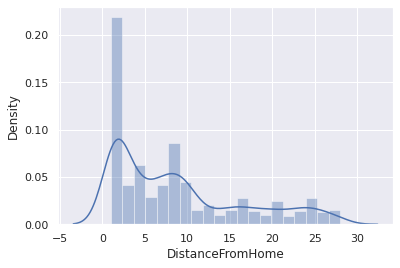

In [442]:
q = data1['DistanceFromHome'].quantile(0.93)
data2 = data1[data1['DistanceFromHome']<q]
data2.describe(include = 'all')
sns.distplot(data2['DistanceFromHome'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



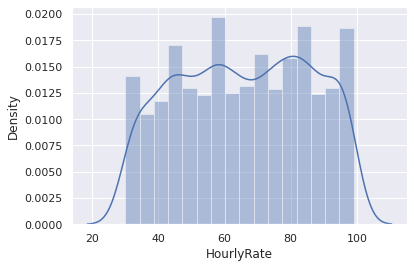

In [443]:
q = data2['HourlyRate'].quantile(0.9999)
data3 = data2[data2['HourlyRate' ]<q]
data3.describe(include = 'all')
sns.distplot(data3['HourlyRate' ])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



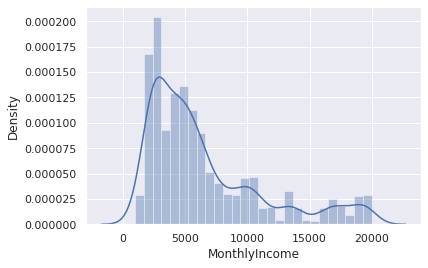

In [444]:
q = data3['MonthlyIncome'].quantile(0.9999)
data4 = data3[data3['MonthlyIncome']<q]
data4.describe(include = 'all')
sns.distplot(data4['MonthlyIncome'])

In [445]:
xytest = data[data['Attrition']!='Yes']
xytest = xytest[xytest['Attrition']!='No']



In [446]:
xytest

,EmployeeNumber,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Attrition
1323,100000,35.0,Travel_Rarely,Research & Development,27.0,1.0,Medical,3.0,Female,53.0,2.0,1.0,Research Scientist,1.0,Single,2559.0,1.0,NaN
1324,100001,27.0,Travel_Rarely,Research & Development,5.0,3.0,Life Sciences,3.0,Female,85.0,3.0,1.0,Research Scientist,2.0,Single,2478.0,1.0,NaN
1325,100002,24.0,Travel_Rarely,Sales,4.0,1.0,Medical,4.0,Female,42.0,3.0,2.0,Sales Executive,3.0,Married,4162.0,1.0,NaN
1326,100003,37.0,Non-Travel,Sales,9.0,4.0,Medical,1.0,Male,69.0,3.0,3.0,Sales Executive,2.0,Divorced,8834.0,1.0,NaN
1327,100004,33.0,Travel_Rarely,Research & Development,1.0,4.0,Other,4.0,Male,63.0,3.0,1.0,Research Scientist,4.0,Single,2686.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,100142,35.0,Non-Travel,Research & Development,8.0,4.0,Life Sciences,3.0,Female,52.0,3.0,2.0,Healthcare Representative,3.0,Married,4148.0,1.0,NaN
1466,100143,41.0,Travel_Rarely,Research & Development,28.0,4.0,Life Sciences,1.0,Female,60.0,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,0.0,NaN
1467,100144,42.0,Travel_Rarely,Research & Development,6.0,3.0,Medical,3.0,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,9.0,NaN
1468,100145,44.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,NaN


In [447]:
data4=data4.dropna()

In [448]:
data4

,EmployeeNumber,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Attrition
0,104,30.0,Travel_Rarely,Research & Development,1.0,1.0,Life Sciences,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,1.0,No
1,1638,38.0,Travel_Rarely,Research & Development,2.0,2.0,Medical,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,3.0,No
2,164,26.0,Travel_Rarely,Research & Development,6.0,3.0,Other,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,1.0,No
3,395,28.0,Travel_Rarely,Research & Development,8.0,2.0,Life Sciences,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,1.0,No
4,53,35.0,Travel_Rarely,Research & Development,4.0,2.0,Other,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438,7969,41.0,Travel_Rarely,Research & Development,28.0,4.0,Life Sciences,1.0,Female,60.0,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,0.0,Yes
4439,7970,41.0,Travel_Rarely,Research & Development,28.0,4.0,Life Sciences,1.0,Female,60.0,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,0.0,Yes
4440,7971,42.0,Travel_Rarely,Research & Development,6.0,3.0,Medical,3.0,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,9.0,Yes
4441,7972,42.0,Travel_Rarely,Research & Development,6.0,3.0,Medical,3.0,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,9.0,Yes


In [449]:
data4.isnull().sum(axis = 0)
data4.reset_index(drop=True)
xytest.reset_index(drop=True)

,EmployeeNumber,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Attrition
0,100000,35.0,Travel_Rarely,Research & Development,27.0,1.0,Medical,3.0,Female,53.0,2.0,1.0,Research Scientist,1.0,Single,2559.0,1.0,NaN
1,100001,27.0,Travel_Rarely,Research & Development,5.0,3.0,Life Sciences,3.0,Female,85.0,3.0,1.0,Research Scientist,2.0,Single,2478.0,1.0,NaN
2,100002,24.0,Travel_Rarely,Sales,4.0,1.0,Medical,4.0,Female,42.0,3.0,2.0,Sales Executive,3.0,Married,4162.0,1.0,NaN
3,100003,37.0,Non-Travel,Sales,9.0,4.0,Medical,1.0,Male,69.0,3.0,3.0,Sales Executive,2.0,Divorced,8834.0,1.0,NaN
4,100004,33.0,Travel_Rarely,Research & Development,1.0,4.0,Other,4.0,Male,63.0,3.0,1.0,Research Scientist,4.0,Single,2686.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,100142,35.0,Non-Travel,Research & Development,8.0,4.0,Life Sciences,3.0,Female,52.0,3.0,2.0,Healthcare Representative,3.0,Married,4148.0,1.0,NaN
143,100143,41.0,Travel_Rarely,Research & Development,28.0,4.0,Life Sciences,1.0,Female,60.0,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,0.0,NaN
144,100144,42.0,Travel_Rarely,Research & Development,6.0,3.0,Medical,3.0,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,9.0,NaN
145,100145,44.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0,NaN


In [450]:
YN_mapping = {"Yes": 1, "No": 0}

In [451]:
data4.iloc[:,-1] = data4.iloc[:,-1].map(YN_mapping)

In [452]:
data4.iloc[:,-1]

0       0
1       0
2       0
3       0
4       0
       ..
4438    1
4439    1
4440    1
4441    1
4442    0
Name: Attrition, Length: 3596, dtype: int64

In [453]:
testx=xytest.iloc[:,:-1]
testx

,EmployeeNumber,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked
1323,100000,35.0,Travel_Rarely,Research & Development,27.0,1.0,Medical,3.0,Female,53.0,2.0,1.0,Research Scientist,1.0,Single,2559.0,1.0
1324,100001,27.0,Travel_Rarely,Research & Development,5.0,3.0,Life Sciences,3.0,Female,85.0,3.0,1.0,Research Scientist,2.0,Single,2478.0,1.0
1325,100002,24.0,Travel_Rarely,Sales,4.0,1.0,Medical,4.0,Female,42.0,3.0,2.0,Sales Executive,3.0,Married,4162.0,1.0
1326,100003,37.0,Non-Travel,Sales,9.0,4.0,Medical,1.0,Male,69.0,3.0,3.0,Sales Executive,2.0,Divorced,8834.0,1.0
1327,100004,33.0,Travel_Rarely,Research & Development,1.0,4.0,Other,4.0,Male,63.0,3.0,1.0,Research Scientist,4.0,Single,2686.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,100142,35.0,Non-Travel,Research & Development,8.0,4.0,Life Sciences,3.0,Female,52.0,3.0,2.0,Healthcare Representative,3.0,Married,4148.0,1.0
1466,100143,41.0,Travel_Rarely,Research & Development,28.0,4.0,Life Sciences,1.0,Female,60.0,2.0,4.0,Manufacturing Director,2.0,Married,13570.0,0.0
1467,100144,42.0,Travel_Rarely,Research & Development,6.0,3.0,Medical,3.0,Male,83.0,3.0,3.0,Research Director,1.0,Married,13348.0,9.0
1468,100145,44.0,Travel_Rarely,Research & Development,15.0,3.0,Medical,1.0,Female,73.0,3.0,3.0,Healthcare Representative,4.0,Married,7978.0,1.0


In [454]:
forscaling = data4.loc[:,['Age','DistanceFromHome', 'HourlyRate', 'MonthlyIncome']]
forscaling2 = testx.loc[:,['Age','DistanceFromHome', 'HourlyRate', 'MonthlyIncome']]


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



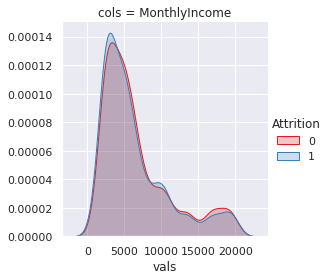

In [455]:
Age_YAC_NCW = data4[[ 'MonthlyIncome','Attrition']]
Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
AYN_melt.head()
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())
#Focus on the red area--distribution of Attrition
#Lots of attrition among the 'young' employees (for Age or for YearsAtCompany)-- not surprising -- trial to find a suit -- company culture.. 
#Those who have worked in more than 5 companies tend to attrit. -- The average time spent in every company is shorter -- HR insight..

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



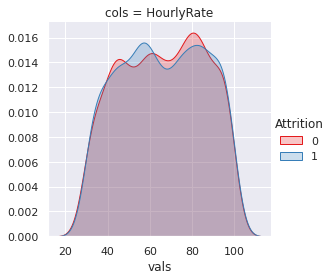

In [456]:
Age_YAC_NCW = data4[[ 'HourlyRate','Attrition']]
Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
AYN_melt.head()
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())
#Focus on the red area--distribution of Attrition
#Lots of attrition among the 'young' employees (for Age or for YearsAtCompany)-- not surprising -- trial to find a suit -- company culture.. 
#Those who have worked in more than 5 companies tend to attrit. -- The average time spent in every company is shorter -- HR insight..

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



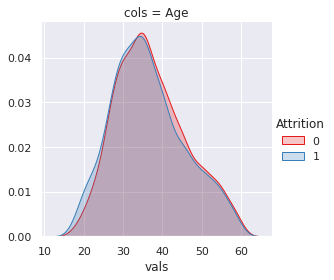

In [457]:
Age_YAC_NCW = data4[['Age','Attrition']]
Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
AYN_melt.head()
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())
#Focus on the red area--distribution of Attrition
#Lots of attrition among the 'young' employees (for Age or for YearsAtCompany)-- not surprising -- trial to find a suit -- company culture.. 
#Those who have worked in more than 5 companies tend to attrit. -- The average time spent in every company is shorter -- HR insight..

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



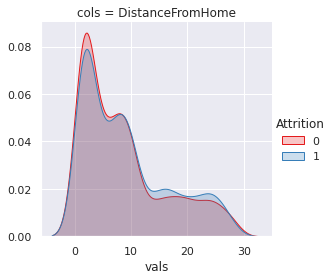

In [458]:
Age_YAC_NCW = data4[['DistanceFromHome','Attrition']]
Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
AYN_melt.head()
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())
#Focus on the red area--distribution of Attrition
#Lots of attrition among the 'young' employees (for Age or for YearsAtCompany)-- not surprising -- trial to find a suit -- company culture.. 
#Those who have worked in more than 5 companies tend to attrit. -- The average time spent in every company is shorter -- HR insight..

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use 

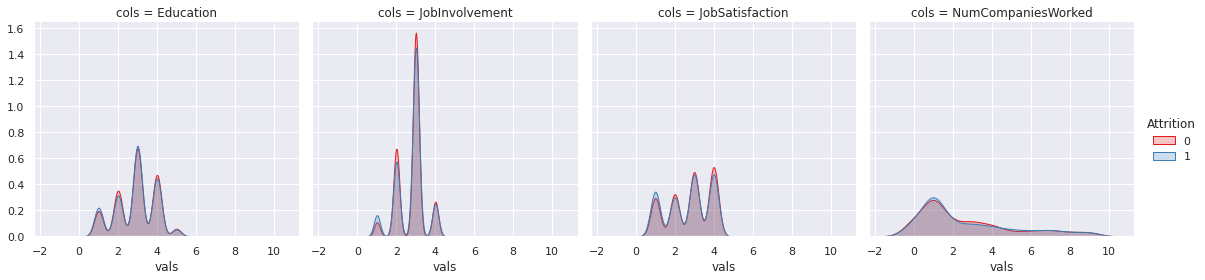

In [459]:
Age_YAC_NCW = data4[[ 'Education', 'JobInvolvement','JobSatisfaction', 'NumCompaniesWorked', 'Attrition']]
Age_YAC_NCW.head()
AYN_melt = Age_YAC_NCW.melt(['Attrition'], var_name='cols',  value_name='vals')
AYN_melt.head()
g = sns.FacetGrid(AYN_melt, col='cols', hue="Attrition", palette="Set1",size=4)
g = (g.map(sns.distplot, "vals", hist=False, rug=False, kde_kws={"shade": True}).add_legend())


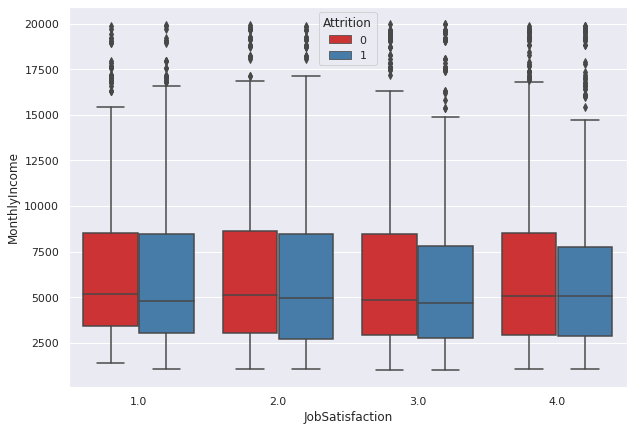

In [460]:
plt.figure(figsize=(10,7))
sns.boxplot(x="JobSatisfaction", y="MonthlyIncome", hue="Attrition",
            data=data4, palette="Set1")

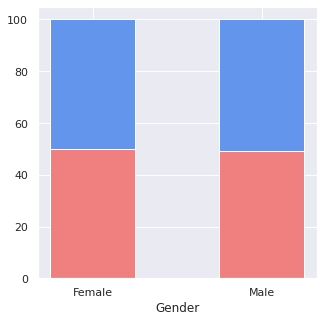

In [461]:
# Data
r = [0,1]
Y_F = len(data4[(data4['Attrition'] == 1) & (data4['Gender'] == 'Female')])
N_F = len(data4[(data4['Attrition'] == 0) & (data4['Gender'] == 'Female')])
Y_M = len(data4[(data4['Attrition'] == 1) & (data4['Gender'] == 'Male')])
N_M = len(data4[(data4['Attrition'] == 0) & (data4['Gender'] == 'Male')])
raw_data = {'greenBars': [Y_F, Y_M], 'orangeBars': [N_F, N_M]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('Female','Male')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Gender")
 
# Show graphic
plt.show()

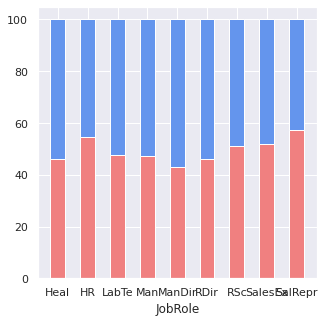

In [462]:
# Data
r = [0,1,2,3,4,5,6,7,8]
Y_F = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Healthcare Representative')])
N_F = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Healthcare Representative')])
Y_M = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Human Resources')])
N_M = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Human Resources')])
Y_C = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Laboratory Technician')])
N_C = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Laboratory Technician')])
Y_D = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Manager')])
N_D = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Manager')])
Y_E = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Manufacturing Director')])
N_E = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Manufacturing Director')])
Y_F = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Research Director')])
N_F = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Research Director')])
Y_G = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Research Scientist')])
N_G = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Research Scientist')])
Y_H = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Sales Executive')])
N_H = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Sales Executive')])
Y_I = len(data4[(data4['Attrition'] == 1) & (data4['JobRole'] == 'Sales Representative')])
N_I = len(data4[(data4['Attrition'] == 0) & (data4['JobRole'] == 'Sales Representative')])

raw_data = {'greenBars': [Y_F, Y_M,Y_C,Y_D,Y_E,Y_F,Y_G,Y_H,Y_I], 'orangeBars': [N_F, N_M,N_C,N_D,N_E,N_F,N_G,N_H,N_I]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('Heal','HR','LabTe','Man','ManDir','RDir', 'RSc', 'SalesEx', 'SalRepr' )
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel('JobRole')
 
# Show graphic
plt.show()

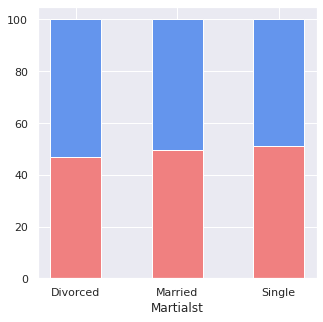

In [463]:
# Data
r = [0,1,2]
Y_F = len(data4[(data4['Attrition'] == 1) & (data4['MaritalStatus'] == 'Divorced')])
N_F = len(data4[(data4['Attrition'] == 0) & (data4['MaritalStatus'] == 'Divorced')])
Y_M = len(data4[(data4['Attrition'] == 1) & (data4['MaritalStatus'] == 'Married')])
N_M = len(data4[(data4['Attrition'] == 0) & (data4['MaritalStatus'] == 'Married')])
Y_C = len(data4[(data4['Attrition'] == 1) & (data4['MaritalStatus'] == 'Single')])
N_C = len(data4[(data4['Attrition'] == 0) & (data4['MaritalStatus'] == 'Single')])

raw_data = {'greenBars': [Y_F, Y_M,Y_C], 'orangeBars': [N_F, N_M,N_C]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('Divorced','Married','Single')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel('Martialst')
 
# Show graphic
plt.show()

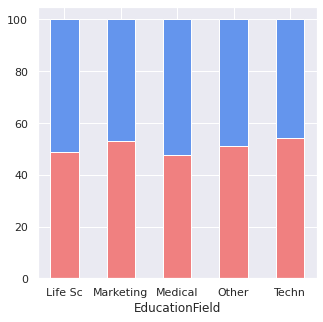

In [464]:
# Data
r = [0,1,2,3,4]
Y_F = len(data4[(data4['Attrition'] == 1) & (data4['EducationField'] == 'Life Sciences')])
N_F = len(data4[(data4['Attrition'] == 0) & (data4['EducationField'] == 'Life Sciences')])
Y_M = len(data4[(data4['Attrition'] == 1) & (data4['EducationField'] == 'Marketing')])
N_M = len(data4[(data4['Attrition'] == 0) & (data4['EducationField'] == 'Marketing')])
Y_C = len(data4[(data4['Attrition'] == 1) & (data4['EducationField'] == 'Medical')])
N_C = len(data4[(data4['Attrition'] == 0) & (data4['EducationField'] == 'Medical')])
Y_D = len(data4[(data4['Attrition'] == 1) & (data4['EducationField'] == 'Other')])
N_D = len(data4[(data4['Attrition'] == 0) & (data4['EducationField'] == 'Other')])
Y_E = len(data4[(data4['Attrition'] == 1) & (data4['EducationField'] == 'Technical Degree')])
N_E = len(data4[(data4['Attrition'] == 0) & (data4['EducationField'] == 'Technical Degree')])

raw_data = {'greenBars': [Y_F, Y_M,Y_C,Y_D,Y_E], 'orangeBars': [N_F, N_M,N_C,N_D,N_E]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('Life Sc','Marketing','Medical','Other','Techn' )
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel('EducationField')
 
# Show graphic
plt.show()

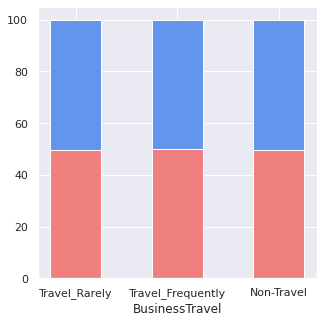

In [465]:
# Data
r = [0,1,2]
Y_F = len(data4[(data4['Attrition'] == 1) & (data4['BusinessTravel'] == 'Travel_Rarely')])
N_F = len(data4[(data4['Attrition'] == 0) & (data4['BusinessTravel'] == 'Travel_Rarely')])
Y_M = len(data4[(data4['Attrition'] == 1) & (data4['BusinessTravel'] == 'Travel_Frequently')])
N_M = len(data4[(data4['Attrition'] == 0) & (data4['BusinessTravel'] == 'Travel_Frequently')])
Y_C = len(data4[(data4['Attrition'] == 1) & (data4['BusinessTravel'] == 'Non-Travel')])
N_C = len(data4[(data4['Attrition'] == 0) & (data4['BusinessTravel'] == 'Non-Travel')])

raw_data = {'greenBars': [Y_F, Y_M,Y_C], 'orangeBars': [N_F, N_M,N_C]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['greenBars'], df['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
 
# plot
plt.figure(figsize=(5,5))
barWidth = 0.5
names = ('Travel_Rarely','Travel_Frequently','Non-Travel')
# Create green Bars
plt.bar(r, greenBars, color='lightcoral', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='cornflowerblue', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel('BusinessTravel')
 
# Show graphic
plt.show()

In [466]:
nonscaled = data4.loc[:,[ 'Education', 'EducationField', 'JobInvolvement',  'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked']]
nonscaled2 = testx.loc[:,[ 'Education', 'EducationField', 'JobInvolvement',  'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked']]
#gender wywalony po comparison, to samo business travel


In [467]:
y = data4.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
4438    1
4439    1
4440    1
4441    1
4442    0
Name: Attrition, Length: 3596, dtype: int64

In [468]:
scaler = StandardScaler()
scaler.fit(forscaling)
x = forscaling
xtest = forscaling2
x1= data4.loc[:,['Age','DistanceFromHome', 'HourlyRate', 'MonthlyIncome','Education', 'EducationField', 'JobInvolvement',  'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked']]

In [469]:
x

,Age,DistanceFromHome,HourlyRate,MonthlyIncome
0,30.0,1.0,55.0,5126.0
1,38.0,2.0,54.0,7756.0
2,26.0,6.0,46.0,2368.0
3,28.0,8.0,66.0,3310.0
4,35.0,4.0,75.0,1951.0
...,...,...,...,...
4438,41.0,28.0,60.0,13570.0
4439,41.0,28.0,60.0,13570.0
4440,42.0,6.0,83.0,13348.0
4441,42.0,6.0,83.0,13348.0


In [470]:
x2 = pd.DataFrame(data=x)
x2 = x2.rename(columns={0: 'Age', 1: 'DistanceFromHome', 2: 'HourlyRate', 3:'MonthlyIncome'})
x2

,Age,DistanceFromHome,HourlyRate,MonthlyIncome
0,30.0,1.0,55.0,5126.0
1,38.0,2.0,54.0,7756.0
2,26.0,6.0,46.0,2368.0
3,28.0,8.0,66.0,3310.0
4,35.0,4.0,75.0,1951.0
...,...,...,...,...
4438,41.0,28.0,60.0,13570.0
4439,41.0,28.0,60.0,13570.0
4440,42.0,6.0,83.0,13348.0
4441,42.0,6.0,83.0,13348.0


In [471]:
nonscaled

,Education,EducationField,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked
0,1.0,Life Sciences,2.0,Laboratory Technician,4.0,Married,1.0
1,2.0,Medical,2.0,Manufacturing Director,3.0,Married,3.0
2,3.0,Other,2.0,Research Scientist,2.0,Married,1.0
3,2.0,Life Sciences,3.0,Research Scientist,4.0,Single,1.0
4,2.0,Other,3.0,Laboratory Technician,4.0,Divorced,1.0
...,...,...,...,...,...,...,...
4438,4.0,Life Sciences,2.0,Manufacturing Director,2.0,Married,0.0
4439,4.0,Life Sciences,2.0,Manufacturing Director,2.0,Married,0.0
4440,3.0,Medical,3.0,Research Director,1.0,Married,9.0
4441,3.0,Medical,3.0,Research Director,1.0,Married,9.0


In [472]:
# datascaled = pd.concat([x2, nonscaled], axis=1, ignore_index=True)
#datascaled = pd.concat([x2.reset_index(drop=True), nonscaled.reset_index(drop=True)], axis=1)

#bezskalowania analizy
datascaled = pd.concat([x.reset_index(drop=True), nonscaled.reset_index(drop=True)], axis=1)
datascaledtest = pd.concat([xtest.reset_index(drop=True), nonscaled2.reset_index(drop=True)], axis=1)


In [473]:

datascaled

,Age,DistanceFromHome,HourlyRate,MonthlyIncome,Education,EducationField,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked
0,30.0,1.0,55.0,5126.0,1.0,Life Sciences,2.0,Laboratory Technician,4.0,Married,1.0
1,38.0,2.0,54.0,7756.0,2.0,Medical,2.0,Manufacturing Director,3.0,Married,3.0
2,26.0,6.0,46.0,2368.0,3.0,Other,2.0,Research Scientist,2.0,Married,1.0
3,28.0,8.0,66.0,3310.0,2.0,Life Sciences,3.0,Research Scientist,4.0,Single,1.0
4,35.0,4.0,75.0,1951.0,2.0,Other,3.0,Laboratory Technician,4.0,Divorced,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3591,41.0,28.0,60.0,13570.0,4.0,Life Sciences,2.0,Manufacturing Director,2.0,Married,0.0
3592,41.0,28.0,60.0,13570.0,4.0,Life Sciences,2.0,Manufacturing Director,2.0,Married,0.0
3593,42.0,6.0,83.0,13348.0,3.0,Medical,3.0,Research Director,1.0,Married,9.0
3594,42.0,6.0,83.0,13348.0,3.0,Medical,3.0,Research Director,1.0,Married,9.0


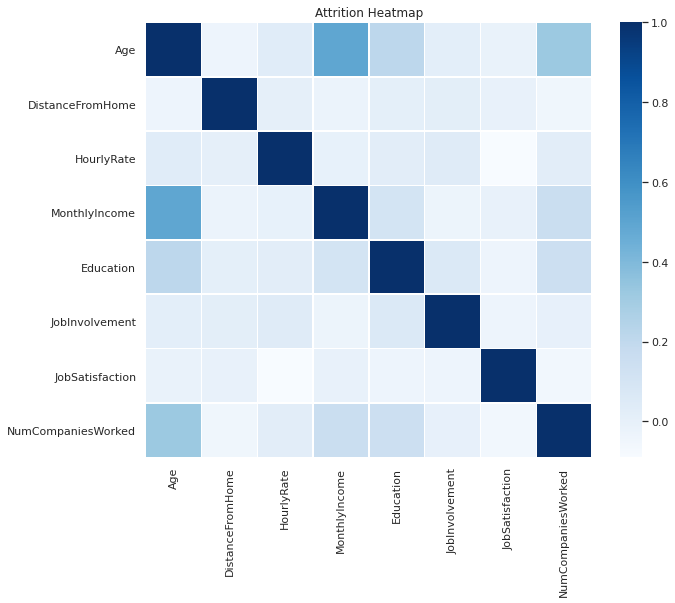

In [474]:
plt.subplots(figsize=(10,8))
ax = plt.axes()
ax.set_title("Attrition Heatmap")
corr = datascaled.corr()
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values, cmap="Blues",linewidths=.5)

In [475]:
datascaled = pd.get_dummies (datascaled)
datascaledtest = pd.get_dummies (datascaledtest)

In [476]:
datascaled
datascaledtest


,Age,DistanceFromHome,HourlyRate,MonthlyIncome,Education,JobInvolvement,JobSatisfaction,NumCompaniesWorked,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,35.0,27.0,53.0,2559.0,1.0,2.0,1.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,27.0,5.0,85.0,2478.0,3.0,3.0,2.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,24.0,4.0,42.0,4162.0,1.0,3.0,3.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,37.0,9.0,69.0,8834.0,4.0,3.0,2.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,33.0,1.0,63.0,2686.0,4.0,3.0,4.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,35.0,8.0,52.0,4148.0,4.0,3.0,3.0,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
143,41.0,28.0,60.0,13570.0,4.0,2.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
144,42.0,6.0,83.0,13348.0,3.0,3.0,1.0,9.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
145,44.0,15.0,73.0,7978.0,3.0,3.0,4.0,1.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


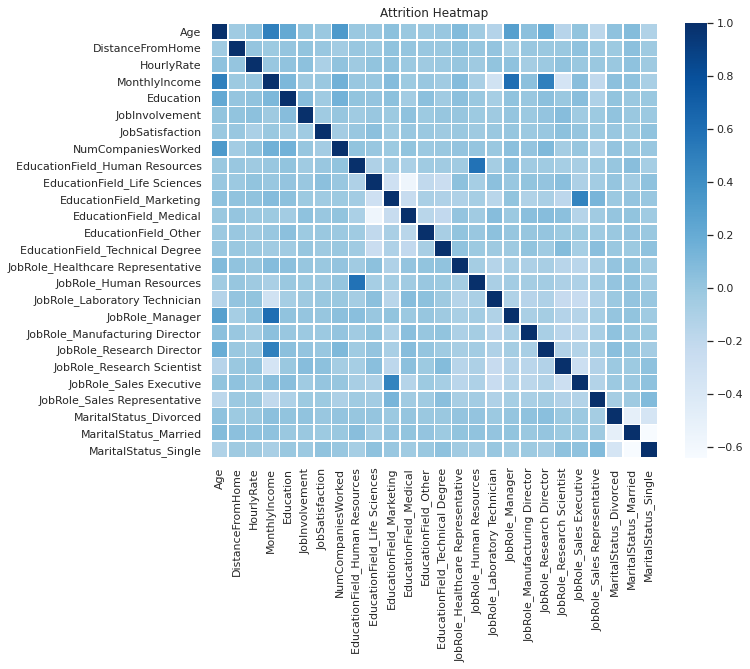

In [477]:
plt.subplots(figsize=(10,8))
ax = plt.axes()
ax.set_title("Attrition Heatmap")
corr = datascaled.corr()
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values, cmap="Blues",linewidths=.5)

In [478]:
data4.describe()

,EmployeeNumber,Age,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,Attrition
count,3596.000000,3596.000000,3596.000000,3596.000000,3596.000000,3596.000000,3596.000000,3596.000000,3596.000000,3596.000000,3596.000000,3596.000000
mean,4545.430756,36.726363,8.811457,2.897664,2.736374,65.837597,2.747497,2.063960,2.724972,6490.464405,2.678254,0.495551
std,2718.398894,9.122116,7.646359,1.024639,1.091130,19.896388,0.707741,1.100675,1.102406,4684.701397,2.503446,0.500050
min,1.000000,18.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,0.000000
25%,1466.750000,30.000000,2.000000,2.000000,2.000000,49.000000,2.000000,1.000000,2.000000,2909.000000,1.000000,0.000000
50%,5671.500000,36.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,0.000000
75%,6794.250000,42.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8381.000000,4.000000,1.000000
max,7973.000000,59.000000,28.000000,5.000000,4.000000,99.000000,4.000000,5.000000,4.000000,19973.000000,9.000000,1.000000


In [479]:
cleaneddata=datascaled
datascaled

,Age,DistanceFromHome,HourlyRate,MonthlyIncome,Education,JobInvolvement,JobSatisfaction,NumCompaniesWorked,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,30.0,1.0,55.0,5126.0,1.0,2.0,4.0,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,38.0,2.0,54.0,7756.0,2.0,2.0,3.0,3.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,26.0,6.0,46.0,2368.0,3.0,2.0,2.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,28.0,8.0,66.0,3310.0,2.0,3.0,4.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,35.0,4.0,75.0,1951.0,2.0,3.0,4.0,1.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3591,41.0,28.0,60.0,13570.0,4.0,2.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3592,41.0,28.0,60.0,13570.0,4.0,2.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3593,42.0,6.0,83.0,13348.0,3.0,3.0,1.0,9.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3594,42.0,6.0,83.0,13348.0,3.0,3.0,1.0,9.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [480]:
x = datascaled
xtest=datascaledtest

In [481]:
visualcomparison = pd.concat([x.reset_index(drop=True), y.reset_index(drop=True)], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



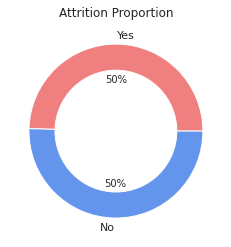

In [482]:
Y_count = len(visualcomparison[visualcomparison['Attrition'] == 1])
N_count = len(visualcomparison[visualcomparison['Attrition'] == 0])
# create data
names='Yes', 'No',
size=[Y_count,N_count]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['lightcoral','cornflowerblue'],autopct='%1.0f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
ax = plt.axes()
ax.set_title("Attrition Proportion")
plt.show()

In [483]:
visualcomparison

,Age,DistanceFromHome,HourlyRate,MonthlyIncome,Education,JobInvolvement,JobSatisfaction,NumCompaniesWorked,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Attrition
0,30.0,1.0,55.0,5126.0,1.0,2.0,4.0,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,38.0,2.0,54.0,7756.0,2.0,2.0,3.0,3.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,26.0,6.0,46.0,2368.0,3.0,2.0,2.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,28.0,8.0,66.0,3310.0,2.0,3.0,4.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,35.0,4.0,75.0,1951.0,2.0,3.0,4.0,1.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3591,41.0,28.0,60.0,13570.0,4.0,2.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
3592,41.0,28.0,60.0,13570.0,4.0,2.0,2.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
3593,42.0,6.0,83.0,13348.0,3.0,3.0,1.0,9.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
3594,42.0,6.0,83.0,13348.0,3.0,3.0,1.0,9.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1


In [484]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y,random_state=42)

In [485]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train, test in cv.split(x, y):
  X_train_kfold, y_train_kfold = x.iloc[train], y.iloc[train]
  X_test_kfold, y_test_kfold = x.iloc[test], y.iloc[test]

SVC
              precision    recall  f1-score   support

           0       0.50      0.61      0.55       363
           1       0.49      0.37      0.42       357

    accuracy                           0.49       720
   macro avg       0.49      0.49      0.48       720
weighted avg       0.49      0.49      0.49       720



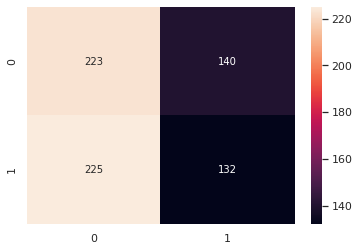

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.46      0.46      0.46       363
           1       0.45      0.45      0.45       357

    accuracy                           0.46       720
   macro avg       0.46      0.46      0.46       720
weighted avg       0.46      0.46      0.46       720



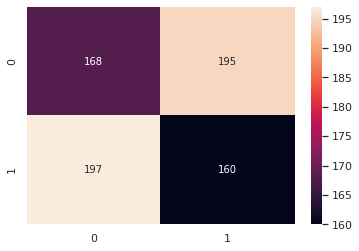

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.45      0.52      0.48       363
           1       0.43      0.37      0.39       357

    accuracy                           0.44       720
   macro avg       0.44      0.44      0.44       720
weighted avg       0.44      0.44      0.44       720



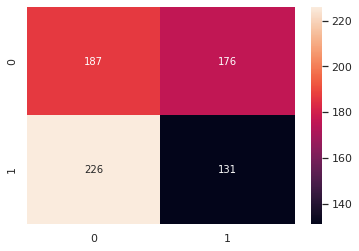

In [486]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
classifiers = [SVC, KNeighborsClassifier, DecisionTreeClassifier]
for classifier_class in classifiers:
    model = classifier_class()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model.__class__.__name__)
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

SVC
              precision    recall  f1-score   support

           0       0.53      0.74      0.62       362
           1       0.57      0.34      0.42       357

    accuracy                           0.54       719
   macro avg       0.55      0.54      0.52       719
weighted avg       0.55      0.54      0.52       719



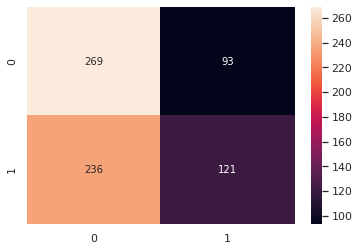

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.47      0.50      0.48       362
           1       0.45      0.42      0.44       357

    accuracy                           0.46       719
   macro avg       0.46      0.46      0.46       719
weighted avg       0.46      0.46      0.46       719



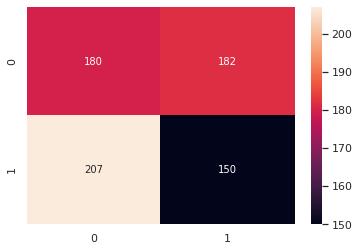

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.47      0.54      0.50       362
           1       0.44      0.37      0.41       357

    accuracy                           0.46       719
   macro avg       0.46      0.46      0.45       719
weighted avg       0.46      0.46      0.45       719



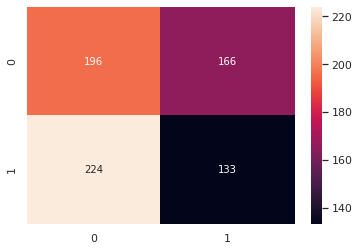

In [487]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
classifiers = [SVC, KNeighborsClassifier, DecisionTreeClassifier]
for classifier_class in classifiers:
    model = classifier_class()
    model.fit(X_train_kfold, y_train_kfold)
    y_pred_kfold = model.predict(X_test_kfold)
    print(model.__class__.__name__)
    print(classification_report(y_test_kfold, y_pred_kfold))
    cm = confusion_matrix(y_test_kfold, y_pred_kfold)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show()

KNN


In [488]:
from sklearn.neighbors import KNeighborsClassifier
# Create and fit the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# Predict on the test features, print the results
pred = knn.predict(X_test)

In [489]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy
def calculate_metrics(target, prediction, average='micro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total
def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [490]:
print_results(calculate_metrics(y_test, pred), 'kNN')

Results for kNN
----
  Accuracy:  0.45555555555555555
  Precision: 0.45555555555555555
  Recall:    0.45555555555555555
  F1 score:  0.45555555555555555
  Mislabeled 392 out of 720




In [491]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

              precision    recall  f1-score   support

           0       0.46      0.46      0.46       363
           1       0.45      0.45      0.45       357

    accuracy                           0.46       720
   macro avg       0.46      0.46      0.46       720
weighted avg       0.46      0.46      0.46       720



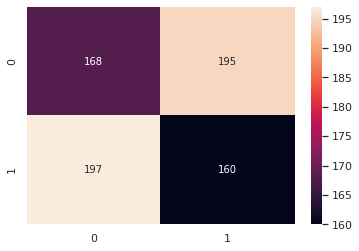

In [492]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt='d')
print(classification_report(y_test, pred))

In [493]:
from sklearn.model_selection import GridSearchCV

In [494]:
# params_knn = {
#     'n_neighbors': [2, 3, 5, 7, 10, 15],
#     'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree']
# }
# clf  = GridSearchCV(KNeighborsClassifier(), params_knn)
# clf.fit(X_train_kfold, y_train_kfold)
# clf.best_params_

In [495]:
knn = KNeighborsClassifier(algorithm= 'auto', metric= 'chebyshev', n_neighbors= 15)

In [496]:
knn.fit(X_train_kfold, y_train_kfold)
y_pred_kfold = knn.predict(X_test_kfold)

In [497]:
print_results(calculate_metrics(y_test_kfold, y_pred_kfold), 'kNN for KFold')

Results for kNN for KFold
----
  Accuracy:  0.502086230876217
  Precision: 0.502086230876217
  Recall:    0.502086230876217
  F1 score:  0.502086230876217
  Mislabeled 358 out of 719




In [498]:
# y_pred = knn.predict()
# y_pred.to_csv(index=False)

In [499]:
# y_pred_kfold_csv = pd.DataFrame(data=y_pred_kfold)
# y_pred_kfold_csv('y_pred.csv', index = False)
# from google.colab import files
# files.download('y_pred.csv')

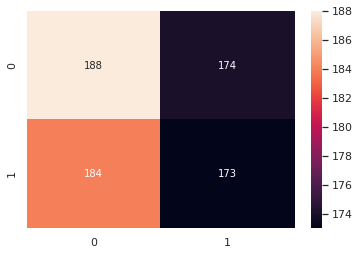

In [500]:
cm = confusion_matrix(y_test_kfold, y_pred_kfold)
sns.heatmap(cm, annot=True, fmt='d')

SVC

In [501]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import recall_score

# params_grid = {
#     'C': [0.01, 0.1, 1, 10, 100,],
#     'kernel': ["linear", "rbf"],
#     'class_weight': [None, "balanced"],
# 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]
# }

# clf = GridSearchCV(SVC(), params_grid, scoring="recall")
# clf.fit(X_train_kfold, y_train_kfold)

In [502]:
model = SVC(C=1, class_weight=None, kernel="rbf")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [503]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.61      0.55       363
           1       0.49      0.37      0.42       357

    accuracy                           0.49       720
   macro avg       0.49      0.49      0.48       720
weighted avg       0.49      0.49      0.49       720



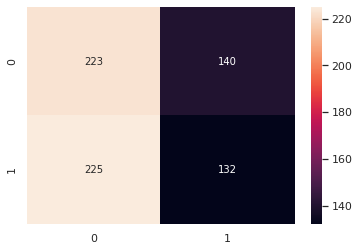

In [504]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [505]:
model.fit(X_train_kfold, y_train_kfold)
y_pred = model.predict(X_test_kfold)

In [506]:
print(classification_report(y_test_kfold, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.74      0.62       362
           1       0.57      0.34      0.42       357

    accuracy                           0.54       719
   macro avg       0.55      0.54      0.52       719
weighted avg       0.55      0.54      0.52       719



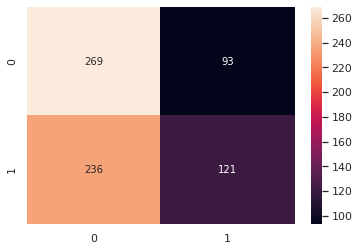

In [507]:
cm = confusion_matrix(y_test_kfold, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

MaritalStatus_Married-0.00%
Representative-0.00%
JobRole_Research Scientist-0.00%
JobRole_Manager-0.00%
EducationField_Human Resources-0.00%
EducationField_Life Sciences-0.00%
JobRole_Healthcare Representative-0.20%
JobRole_Research Director-0.27%
EducationField_Marketing-0.44%
MaritalStatus_Divorced-0.64%
EducationField_Technical Degree-0.67%
JobRole_Sales-0.94%
JobRole_Human Resources-0.95%
EducationField_Other-1.46%
Education-1.61%
JobRole_Sales Executive-1.79%
JobRole_Laboratory Technician-2.18%
EducationField_Medical-2.39%
JobRole_Manufacturing Director-5.32%
NumCompaniesWorked-7.64%
DistanceFromHome-8.13%
HourlyRate-10.30%
JobInvolvement-10.65%
JobSatisfaction-11.68%
MonthlyIncome-14.35%
Age-18.38%

In [508]:
xdr = x.drop(['JobRole_Research Director','JobRole_Manager','EducationField_Life Sciences',  'EducationField_Marketing','JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Sales Representative', 'JobRole_Laboratory Technician', 'EducationField_Technical Degree', 'JobRole_Research Scientist', 'MaritalStatus_Married','EducationField_Marketing','MaritalStatus_Divorced','JobRole_Human Resources','EducationField_Other', 'Education' ,'JobRole_Sales Executive','JobRole_Laboratory Technician', 'EducationField_Medical'], axis=1)
xdrtest = xtest.drop(['JobRole_Research Director','JobRole_Manager','EducationField_Life Sciences',  'EducationField_Marketing','JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Sales Representative', 'JobRole_Laboratory Technician', 'EducationField_Technical Degree', 'JobRole_Research Scientist', 'MaritalStatus_Married','EducationField_Marketing','MaritalStatus_Divorced','JobRole_Human Resources','EducationField_Other', 'Education' ,'JobRole_Sales Executive','JobRole_Laboratory Technician', 'EducationField_Medical'], axis=1)


In [509]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train, test in cv.split(xdr, y):
  X_train_kfolddr, y_train_kfolddr = xdr.iloc[train], y.iloc[train]
  X_test_kfolddr, y_test_kfolddr = xdr.iloc[test], y.iloc[test]

In [510]:
# vm = SVC()

# # Instantiate the GridSearchCV object and run the search
# parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
# searcher = GridSearchCV(vm, parameters)
# searcher.fit(X_train_kfolddr, y_train_kfolddr)

# # Report the best parameters and the corresponding score
# print("Best CV params", searcher.best_params_)
# print("Best CV accuracy", searcher.best_score_)

# # Report the test accuracy using these best parameters
# print("Test accuracy of best grid search hypers:", searcher.score(X_test_kfolddr, y_test_kfolddr))

In [511]:
model = SVC(C=1, class_weight=None, kernel="rbf")

In [512]:
model.fit(X_train_kfolddr, y_train_kfolddr)
y_pred = model.predict(X_test_kfolddr)

In [513]:
X_train_kfolddr

,Age,DistanceFromHome,HourlyRate,MonthlyIncome,JobInvolvement,JobSatisfaction,NumCompaniesWorked,EducationField_Human Resources,JobRole_Manufacturing Director,MaritalStatus_Single
0,30.0,1.0,55.0,5126.0,2.0,4.0,1.0,0,0,0
1,38.0,2.0,54.0,7756.0,2.0,3.0,3.0,0,1,0
2,26.0,6.0,46.0,2368.0,2.0,2.0,1.0,0,0,0
3,28.0,8.0,66.0,3310.0,3.0,4.0,1.0,0,0,1
4,35.0,4.0,75.0,1951.0,3.0,4.0,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3591,41.0,28.0,60.0,13570.0,2.0,2.0,0.0,0,1,0
3592,41.0,28.0,60.0,13570.0,2.0,2.0,0.0,0,1,0
3593,42.0,6.0,83.0,13348.0,3.0,1.0,9.0,0,0,0
3594,42.0,6.0,83.0,13348.0,3.0,1.0,9.0,0,0,0


In [514]:
print(classification_report(y_test_kfolddr, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.74      0.62       362
           1       0.56      0.34      0.42       357

    accuracy                           0.54       719
   macro avg       0.55      0.54      0.52       719
weighted avg       0.55      0.54      0.52       719



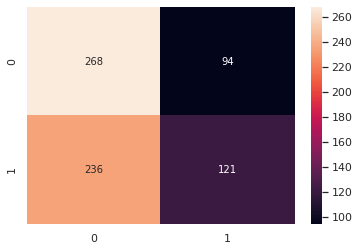

In [515]:
cm = confusion_matrix(y_test_kfolddr, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

piklujemy najlepszy plik

In [516]:
#picklujemy ;pp

y_final = model.predict(xdrtest)



In [517]:
testy

,EmployeeNumber,Attrition
0,100000,1
1,100001,1
2,100002,1
3,100003,1
4,100004,1
...,...,...
142,100142,1
143,100143,1
144,100144,1
145,100145,1


In [518]:
y_final = pd.DataFrame(y_final)
y_final

,0
0,1
1,1
2,0
3,0
4,1
...,...
142,0
143,0
144,0
145,0


In [519]:
sampleoutput = pd.concat([testy.reset_index(drop=True), y_final.reset_index(drop=True)], axis=1)

In [520]:
sample_output = sampleoutput.drop(['Attrition'], axis=1)


In [521]:
sample_output2 = sample_output.rename(columns={0:'Attrition'})
sample_output2

,EmployeeNumber,Attrition
0,100000,1
1,100001,1
2,100002,0
3,100003,0
4,100004,1
...,...,...
142,100142,0
143,100143,0
144,100144,0
145,100145,0


In [522]:
sample_output2.to_csv("y_pred.csv", index=False)

In [523]:
########################################0.49

In [592]:
model_params = {
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': randint(4,200),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': uniform(0.01, 0.199)
}

In [525]:
# # create random forest classifier model
# rf_model = RandomForestClassifier()

# # set up random search meta-estimator
# # this will train 100 models over 5 folds of cross validation (500 models total)
# clf = RandomizedSearchCV(rf_model, model_params, n_iter=1000, cv=5, random_state=1)

# # train the random search meta-estimator to find the best model out of 100 candidates
# model = clf.fit(X_train_kfolddr, y_train_kfolddr)

# # print winning set of hyperparameters
# from pprint import pprint
# pprint(model.best_estimator_.get_params())

In [597]:
rf_model = RandomForestClassifier(bootstrap= True,
 ccp_alpha= 0.0,
 class_weight= None,
 criterion= 'gini',
 max_depth= None,
 max_features= 0.3388878463211182,
 max_leaf_nodes= None,
 max_samples= None,
 min_impurity_decrease= 0.0,
 min_impurity_split= None,
 min_samples_leaf= 1,
 min_samples_split= 0.1911792279768272,
 min_weight_fraction_leaf= 0.0,
 n_estimators= 14,
 n_jobs= None,
 oob_score= False,
 random_state= None,
 verbose= 0,
 warm_start= False)

In [598]:
model = rf_model.fit(X_train_kfolddr, y_train_kfolddr)

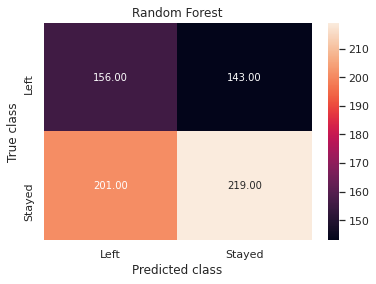

In [599]:
y_preddr = rf_model.predict(X_test_kfolddr)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_preddr, y_test_kfolddr, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [600]:
print(classification_report(y_test_kfold, rf_model.predict(X_test_kfolddr)))

              precision    recall  f1-score   support

           0       0.52      0.60      0.56       362
           1       0.52      0.44      0.48       357

    accuracy                           0.52       719
   macro avg       0.52      0.52      0.52       719
weighted avg       0.52      0.52      0.52       719



In [601]:
y_final = rf_model.predict(xdrtest)

In [602]:
y_final = pd.DataFrame(y_final)
sampleoutput = pd.concat([testy.reset_index(drop=True), y_final.reset_index(drop=True)], axis=1)
sample_output = sampleoutput.drop(['Attrition'], axis=1)
sample_output2 = sample_output.rename(columns={0:'Attrition'})
sample_output2
sample_output2.to_csv("y_pred.csv", index=False)

drzewo

In [530]:
from sklearn.tree import plot_tree

In [531]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [532]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [533]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [534]:
# plt.figure(dpi=300)
# plot_tree(clf)
# plt.show()

Results for Decision Tree train
----
  Accuracy:  0.7521724018074383
  Precision: 0.7521724018074383
  Recall:    0.7521724018074383
  F1 score:  0.7521724018074383
  Mislabeled 713 out of 2877




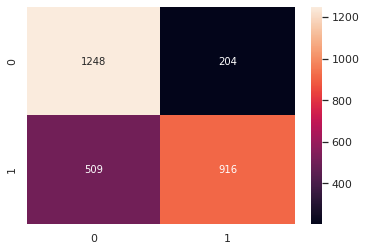

In [535]:
clf = DecisionTreeClassifier()
clf.fit(X_train_kfold, y_train_kfold)
y_dt_train =  clf.predict(X_train_kfold)
print_results(calculate_metrics(y_train_kfold.values, y_dt_train), 'Decision Tree train')
cm = confusion_matrix(y_train_kfold, y_dt_train)
sns.heatmap(cm, annot=True, fmt='d')


Results for Decision Tree train
----
  Accuracy:  0.45479833101529904
  Precision: 0.45479833101529904
  Recall:    0.45479833101529904
  F1 score:  0.45479833101529904
  Mislabeled 392 out of 719




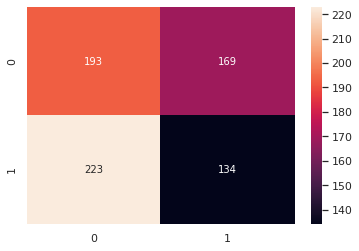

In [536]:
y_dt = clf.predict(X_test_kfold)
print_results(calculate_metrics(y_test_kfold.values, y_dt), 'Decision Tree train')
cm = confusion_matrix(y_test_kfold, y_dt)
sns.heatmap(cm, annot=True, fmt='d')

In [537]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_dt = clf.predict(X_test)

Results for Decision Tree train
----
  Accuracy:  0.752086230876217
  Precision: 0.752086230876217
  Recall:    0.752086230876217
  F1 score:  0.7520862308762171
  Mislabeled 713 out of 2876




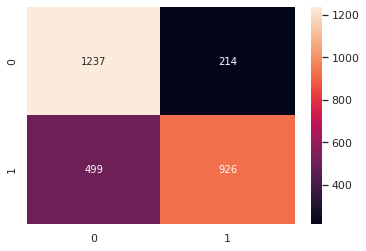

In [538]:
y_dt_train =  clf.predict(X_train)
print_results(calculate_metrics(y_train.values, y_dt_train), 'Decision Tree train')
cm = confusion_matrix(y_train, y_dt_train)
sns.heatmap(cm, annot=True, fmt='d')


Results for Decision Tree train
----
  Accuracy:  0.44166666666666665
  Precision: 0.44166666666666665
  Recall:    0.44166666666666665
  F1 score:  0.44166666666666665
  Mislabeled 402 out of 720




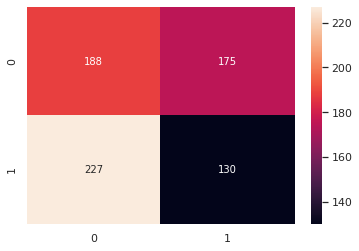

In [539]:
y_dt = clf.predict(X_test)
print_results(calculate_metrics(y_test.values, y_dt), 'Decision Tree train')
cm = confusion_matrix(y_test, y_dt)
sns.heatmap(cm, annot=True, fmt='d')

In [540]:
def plot_confusion_matrix(confusion_matrix, classes, title=None,
                          title_appendix='',
                          cmap=plt.cm.Blues):
    # tytuł wykresu
    if title_appendix:
        title_appendix = f'({title_appendix})'
    if title is None:
        title = f'Confusion matrix {title_appendix}'
    fig, ax = plt.subplots()
    # rysuje CM
    img = ax.imshow(confusion_matrix, cmap=cmap)
    # dodaje pasek z boku
    ax.figure.colorbar(img, ax=ax)
    # dodatki do wykresu
    ax.set_xticks(np.arange(confusion_matrix.shape[1]))
    ax.set_xticklabels(classes, rotation=45, ha='right', rotation_mode='anchor')
    ax.set_yticks(np.arange(confusion_matrix.shape[0]))
    ax.set_yticklabels(classes, rotation=45, ha='right', rotation_mode='anchor')
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    # etykiety
    fmt = '.2f' if confusion_matrix.dtype == 'float' else 'd'
    thresh = confusion_matrix.max() / 2
    for y, row in enumerate(confusion_matrix):
        for x, cell in enumerate(row):
            ax.text(x, y, format(cell, fmt),
                    ha='center', va='center',
                    color='white' if cell > thresh else 'black')
    fig.tight_layout()
    return ax

In [541]:
#print_results(calculate_metrics(y_test.values, y_dt), 'Decision Tree test')
#cm = confusion_matrix(y_test, y_dt)
#plot_confusion_matrix(cm, y)

In [542]:
#classes = cleaneddata.pop(y).unique()

Results for Decision Tree test
----
  Accuracy:  0.44166666666666665
  Precision: 0.44166666666666665
  Recall:    0.44166666666666665
  F1 score:  0.44166666666666665
  Mislabeled 402 out of 720




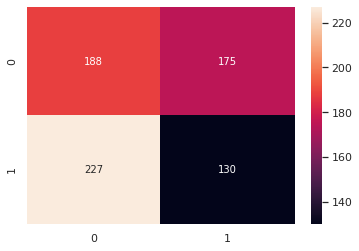

In [543]:
print_results(calculate_metrics(y_test.values, y_dt), 'Decision Tree test')
cm = confusion_matrix(y_test, y_dt)
sns.heatmap(cm, annot=True, fmt='d')

In [544]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

45.97


In [545]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.47      0.48      0.47       363
           1       0.45      0.44      0.45       357

    accuracy                           0.46       720
   macro avg       0.46      0.46      0.46       720
weighted avg       0.46      0.46      0.46       720



In [ ]:
print(X_train)

random forest

In [546]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.45      0.46       363
           1       0.46      0.47      0.46       357

    accuracy                           0.46       720
   macro avg       0.46      0.46      0.46       720
weighted avg       0.46      0.46      0.46       720



In [547]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [548]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [549]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.68      0.58       363
           1       0.50      0.32      0.39       357

    accuracy                           0.50       720
   macro avg       0.50      0.50      0.48       720
weighted avg       0.50      0.50      0.49       720



In [550]:
gnb = GaussianNB()  # inny klasyfikator
gnb.fit(X_train, y_train)
y_gnb = gnb.predict(X_test)
print(y_test.values)
print(y_gnb)
print(confusion_matrix(y_test,y_gnb))

[1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0
 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0
 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1
 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0
 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1
 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0
 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0
 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1
 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1
 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1
 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1
 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 1 1 1 

f1 = 0.48

In [551]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy

def calculate_metrics(target, prediction, average='macro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

In [552]:
print_results(calculate_metrics(y_test.values, y_gnb), 'GNB')

Results for GNB
----
  Accuracy:  0.5027777777777778
  Precision: 0.501454121790482
  Recall:    0.5012616616894692
  F1 score:  0.4849373756104579
  Mislabeled 358 out of 720




In [553]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [554]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.436


In [557]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, shuffle=True,random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.482


In [558]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.44      0.42      0.43       363
           1       0.43      0.46      0.45       357

    accuracy                           0.44       720
   macro avg       0.44      0.44      0.44       720
weighted avg       0.44      0.44      0.44       720



In [559]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

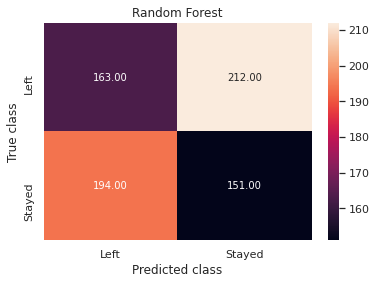

In [560]:
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [561]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [562]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support vector machine accuracy: 0.493


In [563]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



10-fold cross validation average accuracy: 0.492


In [564]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.50      0.61      0.55       363
           1       0.49      0.37      0.42       357

    accuracy                           0.49       720
   macro avg       0.49      0.49      0.48       720
weighted avg       0.49      0.49      0.49       720



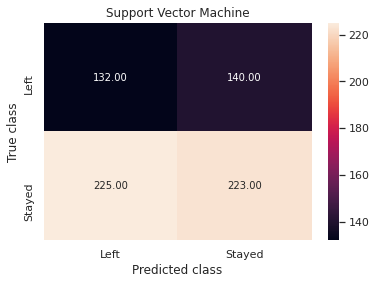

In [565]:
svc_y_pred = svc.predict(X_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

In [566]:

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000000000000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000000000000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [591]:
y_predlog = logreg.predict(X_test)
print(classification_report(y_test, y_predlog))

              precision    recall  f1-score   support

           0       0.53      0.72      0.61       363
           1       0.55      0.36      0.43       357

    accuracy                           0.54       720
   macro avg       0.54      0.54      0.52       720
weighted avg       0.54      0.54      0.52       720



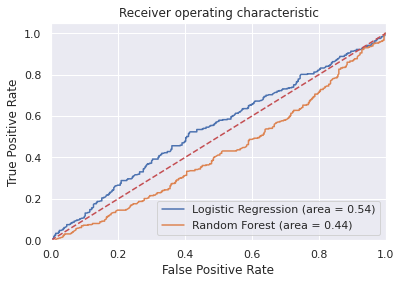

In [567]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

In [568]:
X_train

,Age,DistanceFromHome,HourlyRate,MonthlyIncome,Education,JobInvolvement,JobSatisfaction,NumCompaniesWorked,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
555,31.0,2.0,32.0,2695.0,4.0,3.0,4.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3459,53.0,1.0,34.0,8381.0,1.0,3.0,1.0,7.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1771,33.0,2.0,99.0,3600.0,3.0,3.0,3.0,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
504,40.0,9.0,47.0,5473.0,2.0,3.0,1.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
100,33.0,4.0,47.0,2622.0,4.0,2.0,2.0,6.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,43.0,2.0,72.0,2645.0,2.0,4.0,3.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
794,36.0,5.0,62.0,5914.0,2.0,3.0,2.0,8.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3550,30.0,20.0,85.0,9957.0,3.0,3.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2021,32.0,1.0,71.0,2956.0,1.0,3.0,1.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [569]:
feature_labels = np.array(['Age','DistanceFromHome', 'HourlyRate', 'MonthlyIncome','Education',  'JobInvolvement',  'JobSatisfaction',  'NumCompaniesWorked','EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing','EducationField_Medical'	,'EducationField_Other'	,'EducationField_Technical Degree'	,'JobRole_Healthcare Representative'	,'JobRole_Human Resources'	,'JobRole_Laboratory Technician'	,'JobRole_Manager'	,'JobRole_Manufacturing Director'	,'JobRole_Research Director'	,'JobRole_Research Scientist'	,'JobRole_Sales Executive'	,'JobRole_Sales'	,'Representative'	,'MaritalStatus_Divorced'	,'MaritalStatus_Married'	,'MaritalStatus_Single'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

EducationField_Human Resources-0.37%
JobRole_Research Director-0.69%
JobRole_Manager-0.69%
JobRole_Human Resources-0.71%
JobRole_Sales-0.86%
JobRole_Healthcare Representative-1.04%
EducationField_Marketing-1.04%
EducationField_Other-1.06%
JobRole_Manufacturing Director-1.11%
EducationField_Technical Degree-1.19%
JobRole_Laboratory Technician-1.44%
JobRole_Sales Executive-1.51%
JobRole_Research Scientist-1.56%
Representative-1.69%
EducationField_Medical-1.85%
MaritalStatus_Married-1.94%
MaritalStatus_Divorced-2.04%
EducationField_Life Sciences-2.07%
JobInvolvement-4.62%
JobSatisfaction-5.09%
Education-5.88%
NumCompaniesWorked-7.83%
DistanceFromHome-11.36%
Age-13.25%
HourlyRate-13.76%
MonthlyIncome-15.34%


In [570]:
# Import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# If you're working in Jupyter Notebook, include the following so that plots will display:
%matplotlib inline

In [571]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [572]:
clf = BaggingClassifier(base_estimator=GaussianNB())

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.68      0.57       363
           1       0.48      0.30      0.37       357

    accuracy                           0.49       720
   macro avg       0.49      0.49      0.47       720
weighted avg       0.49      0.49      0.47       720



In [573]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier())

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.44      0.44       363
           1       0.44      0.44      0.44       357

    accuracy                           0.44       720
   macro avg       0.44      0.44      0.44       720
weighted avg       0.44      0.44      0.44       720



In [575]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

# param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], "n_estimators": [50, 100, 400, 700, 1000]}

# gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

# gs = gs.fit(X_train, y_train)



In [577]:
# gspred = gs.predict(X_test)
# print(mean_absolute_error(y_test, gspred))
# print_results(calculate_metrics(y_test, gspred), 'rf')

In [578]:
# import random search, random forest, iris data, and distributions
from sklearn.model_selection import RandomizedSearchCV
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform, truncnorm, randint
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [579]:
model_params = {
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': randint(4,200),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': uniform(0.01, 0.199)
}

In [581]:
# # create random forest classifier model
# rf_model = RandomForestClassifier()

# # set up random search meta-estimator
# # this will train 100 models over 5 folds of cross validation (500 models total)
# clf = RandomizedSearchCV(rf_model, model_params, n_iter=1000, cv=5, random_state=1)

# # train the random search meta-estimator to find the best model out of 100 candidates
# model = clf.fit(X_train_kfold, y_train_kfold)

# # print winning set of hyperparameters
# from pprint import pprint
# pprint(model.best_estimator_.get_params())

In [582]:
rf_model = RandomForestClassifier(bootstrap= True,
 ccp_alpha= 0.0,
 class_weight= None,
 criterion= 'gini',
 max_depth= None,
 max_features= 0.32918999338743815,
 max_leaf_nodes= None,
 max_samples= None,
 min_impurity_decrease= 0.0,
 min_impurity_split= None,
 min_samples_leaf= 1,
 min_samples_split= 0.1985667052246479,
 min_weight_fraction_leaf= 0.0,
 n_estimators= 12,
 n_jobs= None,
 oob_score= False,
 random_state= None,
 verbose= 0,
 warm_start= False)

In [583]:
model = rf_model.fit(X_train_kfold, y_train_kfold)

In [584]:
X_test_kfold

,Age,DistanceFromHome,HourlyRate,MonthlyIncome,Education,JobInvolvement,JobSatisfaction,NumCompaniesWorked,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
6,32.0,3.0,39.0,11159.0,2.0,3.0,4.0,3.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
11,28.0,1.0,82.0,2044.0,3.0,3.0,4.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
17,28.0,9.0,77.0,2377.0,3.0,3.0,3.0,5.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
18,30.0,4.0,40.0,2285.0,3.0,3.0,4.0,9.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
27,32.0,2.0,84.0,2176.0,1.0,2.0,1.0,4.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3569,39.0,12.0,66.0,5295.0,3.0,3.0,2.0,4.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3571,37.0,1.0,51.0,5993.0,4.0,2.0,3.0,1.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3574,35.0,9.0,48.0,5098.0,4.0,3.0,3.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3580,29.0,2.0,78.0,6644.0,3.0,2.0,2.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


f1 = 0.47

              precision    recall  f1-score   support

           0       0.51      0.59      0.55       362
           1       0.51      0.43      0.47       357

    accuracy                           0.51       719
   macro avg       0.51      0.51      0.51       719
weighted avg       0.51      0.51      0.51       719



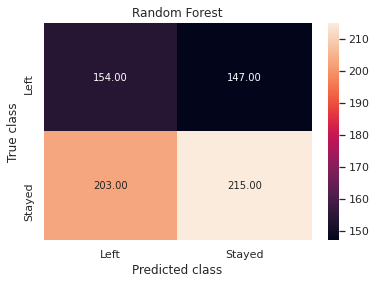

In [587]:
y_pred = rf_model.predict(X_test_kfold)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test_kfold, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')
print(classification_report(y_test_kfold, rf_model.predict(X_test_kfold)))

In [586]:
feature_labels = np.array(['Age','DistanceFromHome', 'HourlyRate', 'MonthlyIncome','Education',  'JobInvolvement',  'JobSatisfaction',  'NumCompaniesWorked','EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing','EducationField_Medical'	,'EducationField_Other'	,'EducationField_Technical Degree'	,'JobRole_Healthcare Representative'	,'JobRole_Human Resources'	,'JobRole_Laboratory Technician'	,'JobRole_Manager'	,'JobRole_Manufacturing Director'	,'JobRole_Research Director'	,'JobRole_Research Scientist'	,'JobRole_Sales Executive'	,'JobRole_Sales'	,'Representative'	,'MaritalStatus_Divorced'	,'MaritalStatus_Married'	,'MaritalStatus_Single'])
importance = rf_model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

MaritalStatus_Married-0.00%
JobRole_Research Scientist-0.00%
JobRole_Manager-0.00%
EducationField_Technical Degree-0.00%
MaritalStatus_Divorced-0.00%
EducationField_Life Sciences-0.00%
EducationField_Human Resources-0.00%
JobRole_Research Director-0.08%
EducationField_Other-0.25%
JobRole_Sales-0.57%
EducationField_Marketing-0.63%
JobRole_Human Resources-0.72%
JobRole_Healthcare Representative-1.33%
Representative-2.79%
Education-3.09%
EducationField_Medical-3.35%
JobRole_Laboratory Technician-3.51%
JobRole_Sales Executive-3.56%
NumCompaniesWorked-4.08%
JobRole_Manufacturing Director-5.12%
HourlyRate-7.99%
MonthlyIncome-8.01%
DistanceFromHome-8.96%
JobInvolvement-11.91%
JobSatisfaction-16.21%
Age-17.86%
